## Question 2: Plotly Conversion

Can you adapt our basic geo_name line graphs to use Plotly Express and be interactive? 

What can this graph tell you about what happens to people in Northern Ireland around the age of 18?

In [1]:
import pandas as pd
from pathlib import Path

if not (source:= Path('data/ni_pop.csv')).exists():
    print('Downloading...')
    source = 'https://www.opendatani.gov.uk/dataset/62e7073f-e924-4d3f-81a5-ad45b5127682/resource/67c25586-b9aa-4717-9a4b-42de21a403f2/download/parliamentary-constituencies-by-single-year-of-age-and-gender-mid-2001-to-mid-2019.csv'

df = pd.read_csv(source) # `read_csv` can read from URL's or from local files aswell
df.to_csv('data/ni_pop.csv', index=False) # Stash for later

## Reminder: How we did it the original way?

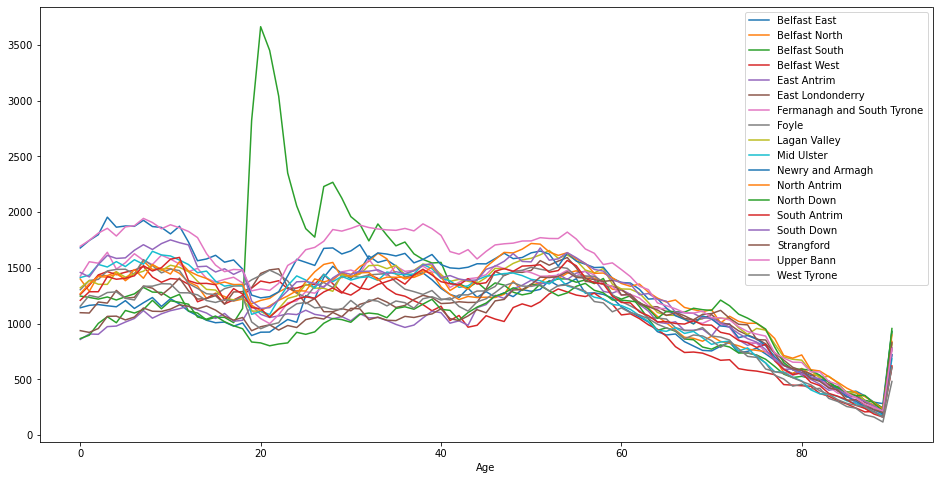

In [9]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(16,8))

for geo, grp in df[df['Mid_Year_Ending']==2019].groupby('Geo_Name'):
    grp_cumsum=grp[grp['Gender'] == 'All persons'].groupby('Age')['Population_Estimate'].sum()
    grp_cumsum.plot(ax=ax, label=geo)
ax.legend()

[Hint](https://plotly.com/python/line-charts/#line-plot-with-plotlyexpress)

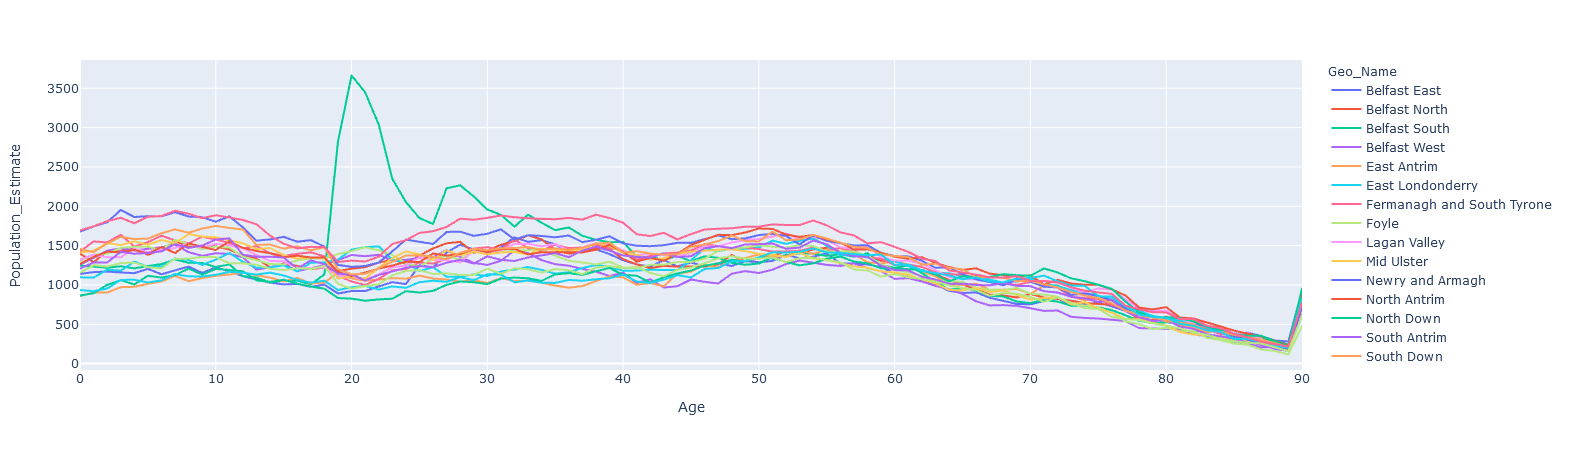

In [8]:
import plotly.express as px

px.line(
    df[(df['Mid_Year_Ending']==2019) & (df['Gender']=='All persons')],
    x='Age',
    y='Population_Estimate',
    color='Geo_Name'
)

In [10]:
## Bonus round
